# Laboratorio 04: Interpolación.
Profesor: Daniel Ruiz Mejía

Nombre: Maria Jose Jaimes Gelves

Métodos computacionales 2025-I


In [27]:
import numpy as np
from scipy.interpolate import CubicHermiteSpline, CubicSpline
import matplotlib.pyplot as plt

# 1.
Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

* tiempos = np.array([0, 3, 5, 8, 13]) # segundos

* distancias = np.array([0, 225, 383, 623, 993]) # metros

* velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo

1. Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando t=10s.

2. ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

<<<<<<<<<< Vamos a predecir la posición del automóvil en t = 10s >>>>>>>>>>

Con el polinomio de Hermite en t=10s, se predice una posición de: 771.96 m
Con el polnomio de Splines Cúbicos en t=10s, se predice una psoición de: 774.8639004149377 m

<<<<<<<<<< Vamos a predecir la velocidad del automóvil en t = 10s >>>>>>>>>>

Con el polinomio de Hermite en t=10s, se predice una velocidad de: 74.64 m/s
Con el polnomio de Splines Cúbicos en t=10s, se predice una velocidad de: 74.1609958506224 m/s

<<<<<<<<<< Vamos a predecir la velocidad máxima del automóvil >>>>>>>>>>

Con el polinomio de Hermite la velocidad máxima predicha es de: 81.97917534360684 m/s
Con el polnomio de Splines Cúbicos la velocidad máxima predicha es de: 80.67941031946695 m/s


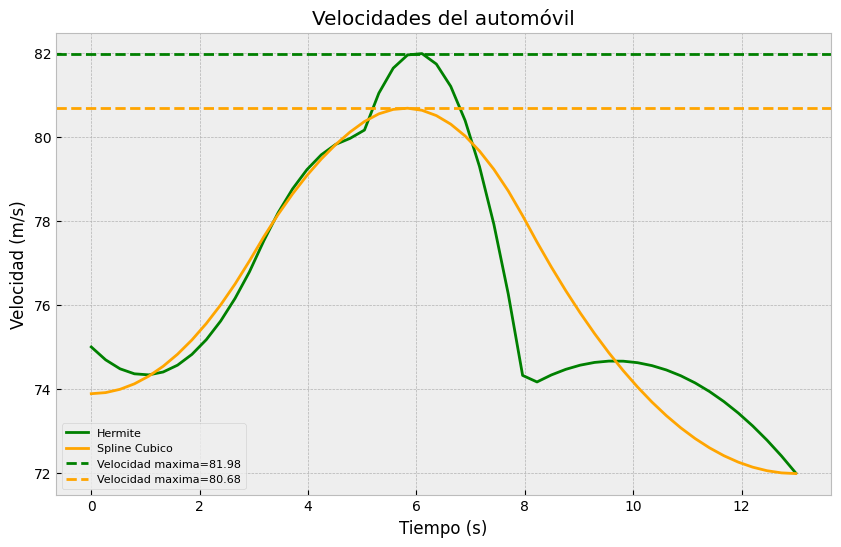

In [28]:

tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
tiempo_evaluar = np.linspace(0,13)

# Para CubicHermiteSpline se necesita la variable intependiente (tiempo),
# la variable dependiente (distancia) y la derivada dydx(velocidad)
hermite_posicion = CubicHermiteSpline(tiempos, distancias, velocidades)
cucbic_posicion = CubicSpline(tiempos, distancias, bc_type='natural') 

print('<<<<<<<<<< Vamos a predecir la posición del automóvil en t = 10s >>>>>>>>>>\n')
print(f'Con el polinomio de Hermite en t=10s, se predice una posición de: {hermite_posicion(10)} m')
print(f'Con el polnomio de Splines Cúbicos en t=10s, se predice una psoición de: {cucbic_posicion(10)} m')

# Como sabemos la velocidad es la derivada de la posicion con respecto al tiempo
# Ahora, como ya tenemos el polinomio de interpolación de las distancias, 
# solo debemos derivarlo para hallar las velocidades

hermite_velocidad = hermite_posicion.derivative()
cubic_velocidad = cucbic_posicion.derivative()

print('\n<<<<<<<<<< Vamos a predecir la velocidad del automóvil en t = 10s >>>>>>>>>>\n')
print(f'Con el polinomio de Hermite en t=10s, se predice una velocidad de: {hermite_velocidad(10)} m/s')
print(f'Con el polnomio de Splines Cúbicos en t=10s, se predice una velocidad de: {cubic_velocidad(10)} m/s')

maxvh = max(hermite_velocidad(tiempo_evaluar))
maxvc = max(cubic_velocidad(tiempo_evaluar))

print('\n<<<<<<<<<< Vamos a predecir la velocidad máxima del automóvil >>>>>>>>>>\n')
print(f'Con el polinomio de Hermite la velocidad máxima predicha es de: {maxvh} m/s')
print(f'Con el polnomio de Splines Cúbicos la velocidad máxima predicha es de: {maxvc} m/s')

plt.figure(figsize=(10,6))
plt.style.use('bmh')
plt.plot(tiempo_evaluar, hermite_velocidad(tiempo_evaluar), label='Hermite', c='green')
plt.plot(tiempo_evaluar, cubic_velocidad(tiempo_evaluar), label='Spline Cubico', c='orange')
plt.axhline(maxvh,ls='--',c='green',label=f'Velocidad maxima={round(maxvh,2)}')
plt.axhline(maxvc,ls='--',c='orange',label=f'Velocidad maxima={round(maxvc,2)}')
plt.title('Velocidades del automóvil')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.legend(fontsize=8)

# 2.
Los valores de la aceleración gravitacional $ g $ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. 

Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

* y = [0, 20000, 40000, 60000, 80000]  # en metros

* g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²

<<<<<< Vamos a estimar el valor de la aceleración gravitacional en distintas altitudes >>>>>>

Para una altitud de 5000 m el valor de la gravedad es de: 9.794654101562498
Para una altitud de 42000 m el valor de la gravedad es de: 9.681858665
Para una altitud de 90000 m el valor de la gravedad es de: 9.538415625


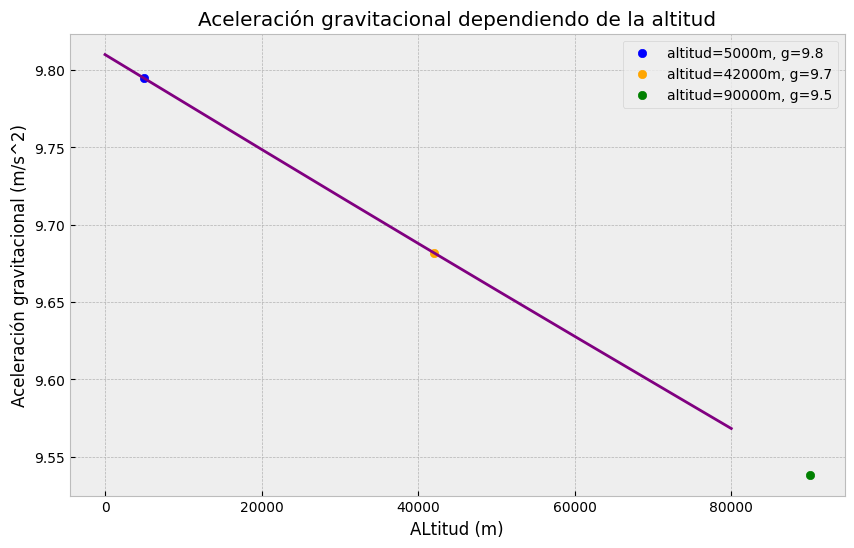

In [67]:
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
y_graf = np.linspace(0, 80000, 1000)

def diferencia_dividida(x, y, i, j):
    '''Calcula la diferencia dividida de Newton de orden (j-i) para los datos x, y.'''
    if j == i:
        return y[i]
    else:
        numerador = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        denominador = x[j] - x[i]
        return numerador / denominador

def coeficientes_newton(x, y):
    '''Calcula los coeficientes del polinomio de Newton para los datos x, y.'''
    n = len(x)
    coef = np.zeros_like(x, dtype=float)
    for j in range(n):
        coef[j] = diferencia_dividida(x, y, 0, j)
    return coef

def polinomio_newton(x, y, x_interpolacion):
    '''Devuelve una función evaluable del polinomio de Newton para los datos x, y.'''
    coef = coeficientes_newton(x, y)
    resultado = coef[0]
    producto = 1
    for i in range(1, len(x)):
        producto *= (x_interpolacion - x[i - 1])
        resultado += coef[i] * producto
    return resultado

altitud1 = polinomio_newton(y, g, 5000)
altitud2 = polinomio_newton(y, g, 42000)
altitud3 = polinomio_newton(y, g, 90000)

print('<<<<<< Vamos a estimar el valor de la aceleración gravitacional en distintas altitudes >>>>>>\n')
print(f'Para una altitud de 5000 m el valor de la gravedad es de: {altitud1}')
print(f'Para una altitud de 42000 m el valor de la gravedad es de: {altitud2}')
print(f'Para una altitud de 90000 m el valor de la gravedad es de: {altitud3}')

plt.figure(figsize=(10,6))
plt.style.use('bmh')
plt.plot(y_graf, polinomio_newton(y, g, y_graf), c='purple')
plt.scatter(5000, altitud1, label=f'altitud=5000m, g={altitud1:.2}', c='blue')
plt.scatter(42000, altitud2, label=f'altitud=42000m, g={altitud2:.2}', c='orange')
plt.scatter(90000, altitud3, label=f'altitud=90000m, g={altitud3:.2}', c='green')
plt.xlabel('ALtitud (m)')
plt.ylabel('Aceleración gravitacional (m/s^2)')
plt.title('Aceleración gravitacional dependiendo de la altitud')
plt.legend()

# 3.
La densidad del aire $ \rho $ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

* T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K

* rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

C:\Users\majoj\AppData\Local\Temp\ipykernel_5236\2578224492.py:28: RuntimeWarning: overflow encountered in scalar multiply
  producto *= (x_interpolacion - x[i - 1])


POLINOMIO DE NEWTON

<<<<<< Vamos a estimar el valor de la densidad del aire para distintas temperaturas >>>>>>

Para una temperatura de 250 K el valor de la densidad del aire es de: 1.3957
Para una temperatura de 800 K el valor de la densidad del aire es de: 0.5224
Para una temperatura de 3000 K el valor de la densidad del aire es de: 0.1251


SPLINES CUBICOS

<<<<<< Vamos a estimar el valor de la densidad del aire para distintas temperaturas >>>>>>

Para una temperatura de 250 K el valor de la densidad del aire es de: 1.3559
Para una temperatura de 800 K el valor de la densidad del aire es de: 0.4444
Para una temperatura de 3000 K el valor de la densidad del aire es de: 0.1026


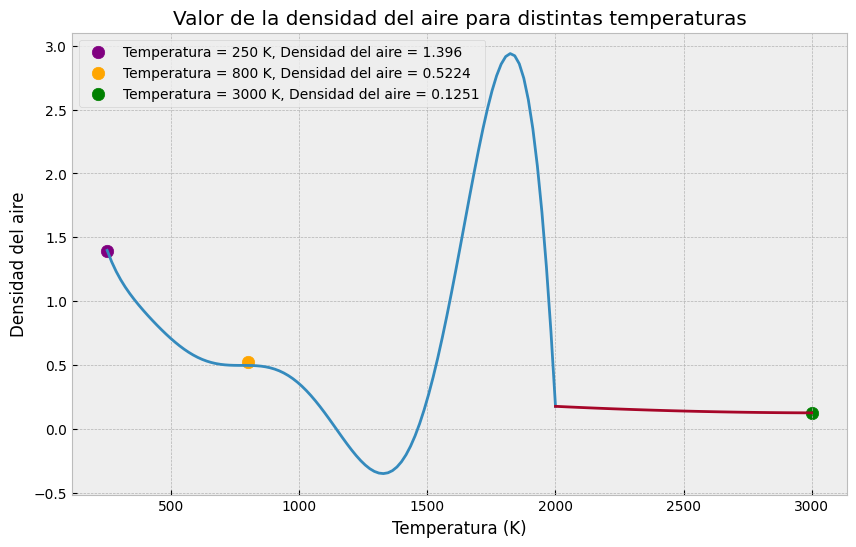

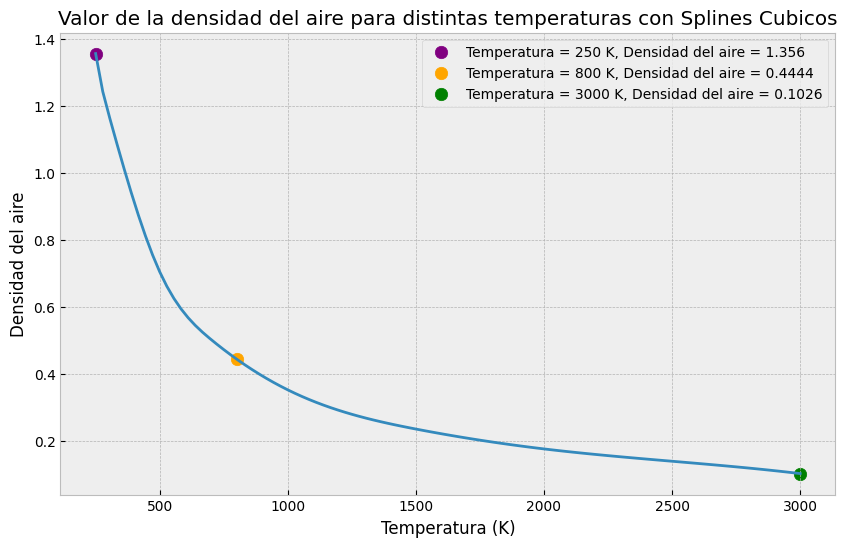

In [86]:
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
T_sub = T[-3:] 
rho_sub = rho[-3:]
t_graf = np.linspace(250,2000,100)
tgrad = np.linspace(2000,3000,100)

temperatura1 = polinomio_newton(T, rho, 250)
temperatura2 = polinomio_newton(T, rho, 800)
temperatura3 = polinomio_newton(T_sub, rho_sub, 3000)

print('POLINOMIO DE NEWTON\n')
print('<<<<<< Vamos a estimar el valor de la densidad del aire para distintas temperaturas >>>>>>\n')
print(f'Para una temperatura de 250 K el valor de la densidad del aire es de: {temperatura1:.5}')
print(f'Para una temperatura de 800 K el valor de la densidad del aire es de: {temperatura2:.4}')
print(f'Para una temperatura de 3000 K el valor de la densidad del aire es de: {temperatura3}\n')

cubico = CubicSpline(T, rho, bc_type='natural')

print('\nSPLINES CUBICOS\n')
print('<<<<<< Vamos a estimar el valor de la densidad del aire para distintas temperaturas >>>>>>\n')
print(f'Para una temperatura de 250 K el valor de la densidad del aire es de: {cubico(250):.5}')
print(f'Para una temperatura de 800 K el valor de la densidad del aire es de: {cubico(800):.4}')
print(f'Para una temperatura de 3000 K el valor de la densidad del aire es de: {cubico(3000):.4}')


plt.figure(figsize=(10,6))
plt.style.use('bmh')
plt.plot(t_graf, polinomio_newton(T, rho, t_graf))
plt.plot(tgrad, polinomio_newton(T_sub, rho_sub, tgrad))
plt.xlabel('Temperatura (K)')
plt.ylabel('Densidad del aire')
plt.title('Valor de la densidad del aire para distintas temperaturas')
plt.scatter(250, temperatura1, c='purple', label=f'Temperatura = 250 K, Densidad del aire = {temperatura1:.4}', s=80)
plt.scatter(800, temperatura2, c='orange', label=f'Temperatura = 800 K, Densidad del aire = {temperatura2:.4}', s=80)
plt.scatter(3000, temperatura3, c='green', label=f'Temperatura = 3000 K, Densidad del aire = {temperatura3:.4}', s=80)
plt.legend()

tcubico = np.linspace(250, 3000, 100)

plt.figure(figsize=(10,6))
plt.style.use('bmh')
plt.plot(tcubico, cubico(tcubico))
plt.xlabel('Temperatura (K)')
plt.ylabel('Densidad del aire')
plt.title('Valor de la densidad del aire para distintas temperaturas con Splines Cubicos')
plt.scatter(250, cubico(250), c='purple', label=f'Temperatura = 250 K, Densidad del aire = {cubico(250):.4}', s=80)
plt.scatter(800, cubico(800), c='orange', label=f'Temperatura = 800 K, Densidad del aire = {cubico(800):.4}', s=80)
plt.scatter(3000, cubico(3000), c='green', label=f'Temperatura = 3000 K, Densidad del aire = {cubico(3000):.4}', s=80)
plt.legend()

Cuando hice el código, al evaluar cuando la temperatura era de 3000 K el valor de la densidad del aire, daba un valor bastante extraño, busque como solucionar este problema y decia que era el Fenomeno de Runge, que dice que cuando se usan muchos puntos en interpolación polinómica global, especialmente en los extremos, el polinomio puede oscilar fuertemente y producir valores muy alejados (divergentes) fuera del rango de datos. Esto produce que al calcular el valor en 3000 K de un resultado extraño, para solucionarlo de cierta forma utilice los ultimos 4 puntos para que el grado del polinomio no fuera tan grande, sin embargo, podemos ver que la grafica es extraña . Sin embargo, decidi compararlo con el resultado utilizando la funcion Splines Cubicos

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $ \Omega$ a 0 $°C$ y cambia alrededor de 0.39 $ \Omega /°C$. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

 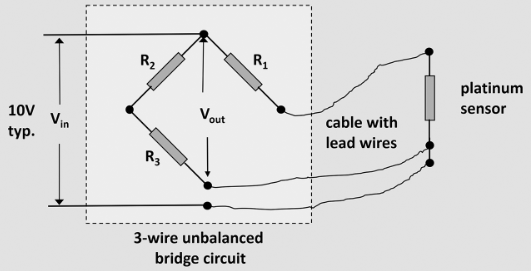

A continuación se presentan mediciones tomadas de dicho circuito, con R1=R2=5 $k\Omega $ y R3=120 $\Omega$ :

* resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)

* voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a 100 $°C$. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida

In [51]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

cubic=CubicSpline(resistencia, voltaje, bc_type='natural')
newton = polinomio_newton(resistencia, voltaje, 139.27)

print('<<<<<<<<< Vamos a estimar la resistencia medida del puente para un voltaje de 0 V >>>>>>>>>\n')
print(f'Utilizando el método de Splines Cubicos obtenemos un voltaje de: {cubic(139.27)} V')
print(f'Utilizando el Polinomio de Newton obtenemos un voltaje de: {newton} V\n')

# Ahora vamos a estimar la resistencia medida si el voltaje aplicado es 0 V
# Como vamos a buscar la resistencia, para utilizar el metodo de CubicSplines volteamos la lista de
# resistencias y voltajes, para ordenar los voltajes de menor a mayor y no alterar su respectivo voltaje

resistencias_ = resistencia[::-1]
voltajes_ = voltaje[::-1]

cubic2 = CubicSpline(voltajes_, resistencias_, bc_type='natural')
newton2 = polinomio_newton(voltajes_, resistencias_, 0)

print('\n<<<<< Vamos a estimar el voltaje de salida del puente para una resitencia de 139.27 Ω >>>>>\n')
print(f'Utilizando el método de Splines Cubicos obtenemos una resistencia de: {cubic2(0)} Ω')
print(f'Utilizando el Polinomio de Newton obtenemos una resistencia de: {newton2} Ω')


<<<<<<<<< Vamos a estimar la resistencia medida del puente para un voltaje de 0 V >>>>>>>>>

Utilizando el método de Splines Cubicos obtenemos un voltaje de: -0.3699510277321739 V
Utilizando el Polinomio de Newton obtenemos un voltaje de: -0.370155133667042 V


<<<<< Vamos a estimar el voltaje de salida del puente para una resitencia de 139.27 Ω >>>>>

Utilizando el método de Splines Cubicos obtenemos una resistencia de: 119.97910699092803 Ω
Utilizando el Polinomio de Newton obtenemos una resistencia de: 120.0000967201713 Ω


# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

* lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å

* indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

Vamos a estimar la longitud de onda donde el índice de refracción es 1.520

Utilizando el método de Splines Cubicos obtenemos una longitud de onda de: 4480.9640823086975

Vamos a verlo gráficamente


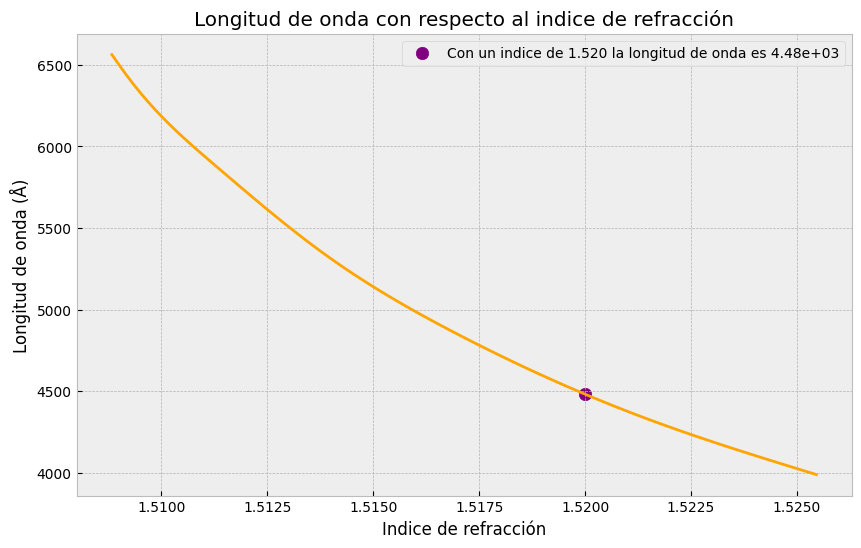

In [70]:
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

cubic_i = CubicSpline(indice_refraccion, lambda_angstrom, bc_type='natural')

print('Vamos a estimar la longitud de onda donde el índice de refracción es 1.520\n')
print(f'Utilizando el método de Splines Cubicos obtenemos una longitud de onda de: {cubic_i(1.520)}')

print('\nVamos a verlo gráficamente')

londa= cubic_i(1.520)
refracciones = np.linspace(1.50883, 1.52546, 100)

plt.figure(figsize=(10,6))
plt.style.use('bmh')
plt.plot(refracciones, cubic_i(refracciones), c='orange')
plt.scatter(1.520, londa, c='purple', label=f'Con un indice de 1.520 la longitud de onda es {londa:.3}', s=80)
plt.xlabel('Indice de refracción')
plt.ylabel('Longitud de onda (Å)')
plt.title('Longitud de onda con respecto al indice de refracción')
plt.legend()